In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

In [4]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
from keras import models
from keras import layers

def make_classifier(optimizer):
    model = models.Sequential()
    
    model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
   
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) 
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.Flatten())
    
    model.add(layers.Dense(64))
    model.add(layers.Activation('relu'))
    
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    return model

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
model = make_classifier('rmsprop')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [9]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.3001 - acc: 0.9072
Epoch 2/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0626 - acc: 0.9806
Epoch 3/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0404 - acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0306 - acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0243 - acc: 0.9921
Epoch 6/10
60000/60000 [==============================] - 40s 666us/step - loss: 0.0198 - acc: 0.9938
Epoch 7/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.0157 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0134 - acc: 0.9957
Epoch 9/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0109 - acc: 0.9963
Epoch 10/10
60000/60000 [==============================] - 42s 693us/step - loss: 

In [10]:
history_dict = history.history
history_dict.keys()

['acc', 'loss']

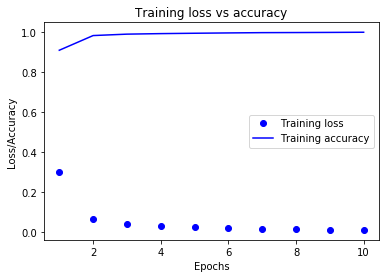

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.title('Training loss vs accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss

10000/10000 [==============================] - 2s 228us/step


0.031055247374592546

In [17]:
test_acc

0.9919